In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N=10000
count=0
pix=np.loadtxt('File'+str(10010)+'.txt')  
x,y=np.shape(pix) # to get the dimensions for our matrix
X=np.zeros((x*y,51))
for i in range(10,61):
    name='File'+str(N+i)+'.txt'
    pix=np.loadtxt(name)
    x,y=np.shape(pix)
    one_column=np.reshape(pix,(x*y,1))
    X[:,count:(count+1)]=one_column
    count+=1
X

array([[34., 31., 31., ..., 37., 36., 35.],
       [34., 31., 31., ..., 37., 36., 35.],
       [34., 31., 31., ..., 37., 36., 35.],
       ...,
       [ 3.,  3.,  9., ...,  9.,  8.,  9.],
       [ 3.,  3.,  9., ...,  9.,  8.,  9.],
       [ 3.,  3.,  9., ...,  9.,  8.,  9.]])

Text(0, 0.5, 'singular values')

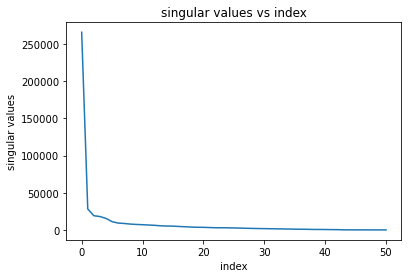

In [ ]:
u,s,v=np.linalg.svd(X,full_matrices=False)

index=[]
for i in range(len(s)):
    index+=[i]
plt.plot(index,s)
plt.title('singular values vs index')
plt.xlabel('index')
plt.ylabel('singular values')


Text(0.5, 1.0, 'ratios vs index')

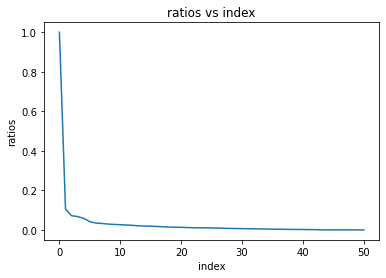

In [ ]:
#for ratios:

ratios=[]
for i in s:
    ratios+=[i/s[0]]
    
plt.plot(index,ratios)
plt.xlabel('index')
plt.ylabel('ratios')
plt.title('ratios vs index')

In [ ]:
def svd(u,s,v,index):
    matrix=np.zeros((u.shape[0],v.shape[1]))
    for i in range(1,index+1):
        matrix+=u[:,i-1:i]*v[i-1:i,:]*s[i-1]
        
    return matrix


In [ ]:
photorames=[1,2,5,10]
sequence_matrix=[]
for j in (photorames):
    sequence_matrix+=[svd(u,s,v,j)]
    
#note that the sequence_matrix list contains all matrices of the four cases of singualr values: 
#1 ,2 5 and 10 singular values respectively    

In [ ]:
sequence_matrix

[array([[34.84598367, 34.88791684, 35.10354574, ..., 42.94695039,
         43.25141183, 43.43922342],
        [34.80621969, 34.84810502, 35.06348786, ..., 42.89794213,
         43.20205613, 43.3896534 ],
        [34.80621969, 34.84810502, 35.06348786, ..., 42.89794213,
         43.20205612, 43.3896534 ],
        ...,
        [ 7.92205788,  7.93159117,  7.98061331, ...,  9.76377163,
          9.83298939,  9.87568741],
        [ 7.84503452,  7.85447513,  7.90302064, ...,  9.66884194,
          9.73738673,  9.77966961],
        [ 7.84503452,  7.85447513,  7.90302064, ...,  9.66884194,
          9.73738673,  9.77966961]]),
 array([[31.0464843 , 31.02725215, 31.19626837, ..., 48.08333941,
         48.21021881, 47.82689346],
        [31.08258053, 31.06452174, 31.23422256, ..., 47.93177881,
         48.06185636, 47.68971992],
        [31.08258053, 31.06452174, 31.23422256, ..., 47.93177881,
         48.06185636, 47.68971992],
        ...,
        [ 8.54068814,  8.5601803 ,  8.61679187, ...,  

In [ ]:
# we can also check up whether the matrices we got is correct or not
# that is if we multiply u,s, and v by taking all the singular 
#values (51 values) we should get exactly the same origina matrix

svd(u,s,v,51)

array([[34., 31., 31., ..., 37., 36., 35.],
       [34., 31., 31., ..., 37., 36., 35.],
       [34., 31., 31., ..., 37., 36., 35.],
       ...,
       [ 3.,  3.,  9., ...,  9.,  8.,  9.],
       [ 3.,  3.,  9., ...,  9.,  8.,  9.],
       [ 3.,  3.,  9., ...,  9.,  8.,  9.]])